<a href="https://colab.research.google.com/github/moqri/Aging-Cell-Morphology/blob/master/plot_raw_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
image_file='AMC-24--001-macurato.tif'
url='https://github.com/moqri/Aging-Cell-Morphology/blob/master/'+image_file+'?raw=true'
import urllib.request
urllib.request.urlretrieve(url, image_file)

('AMC-24--001-macurato.tif', <http.client.HTTPMessage at 0x10e2b5470>)

In [2]:
from PIL import Image
import numpy as np
imarray = np.array(Image.open(image_file))
imarray.shape   ############### THERE ARE THREE CHANNELS!

(1040, 1388, 3)

In [3]:
from skimage import color, util
img_hed = color.rgb2hed(imarray)
img_hema = img_hed[:, :, 0]
img_eosin = img_hed[:, :, 1]
img_dab = img_hed[:, :, 2]

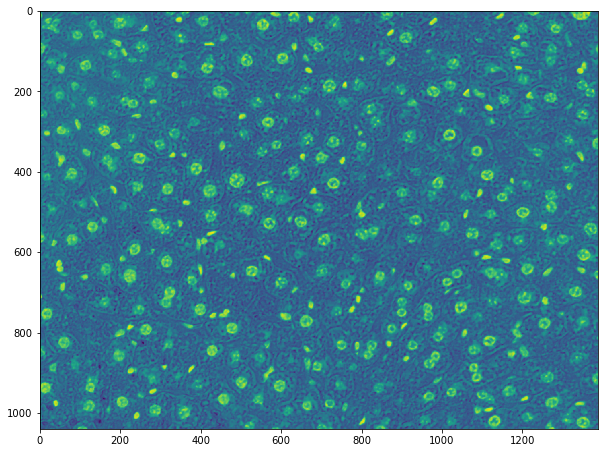

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

f = plt.figure(figsize=(10, 10))
plt.imshow(img_hema)

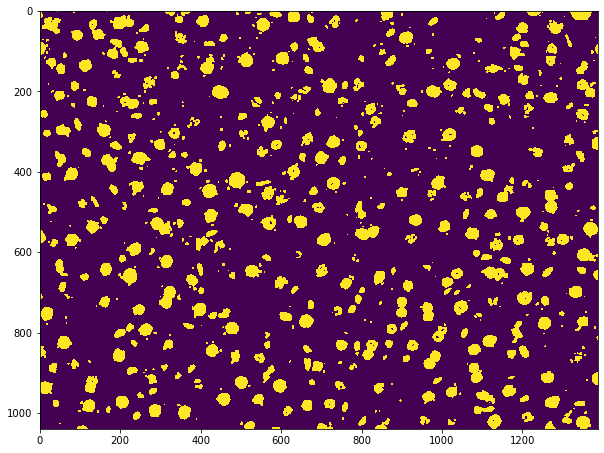

In [5]:
import cv2

# Blur image to remove noise
frame=cv2.GaussianBlur(img_hema, (3, 3), 0)

# Switch image from BGR colorspace to HSV
#hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# define range of black color in HSV
bmin = (-.4)
bmax = (-.3)

# Sets pixels to white if in black range, else will be set to black
mask = cv2.inRange(frame, bmin, bmax)

# Bitwise-AND of mask and black only image - only used for display
#res = cv2.bitwise_and(frame, frame, mask= mask)

#mask = cv2.erode(mask, None, iterations=1)
# commented out erode call, detection more accurate without it

# dilate makes the in range areas larger
mask = cv2.dilate(mask, None, iterations=1)
f = plt.figure(figsize=(10, 10))
plt.imshow(mask)

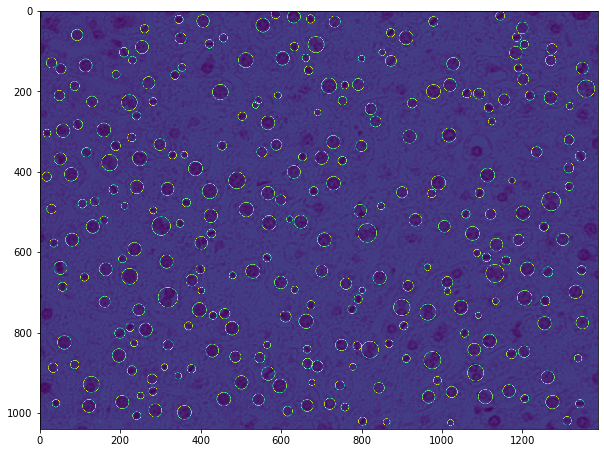

In [6]:

# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 0;
params.maxThreshold = 256;

# Filter by Area.
params.filterByArea = True
params.minArea = 200

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.5

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.1

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.1

detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
reversemask=255-mask
keypoints = detector.detect(reversemask)
img_with_keypoints = cv2.drawKeypoints(imarray, keypoints, outImage=np.array([]), color=(255, 0, 0),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

f = plt.figure(figsize=(10, 10))
plt.imshow(img_with_keypoints[:,:,0])

In [68]:
one_month='/Users/mahdimoqri/Downloads/data/1M_AL_Male/'
one_year='/Users/mahdimoqri/Downloads/data/24M_AL_Male/'
one_month_images=[]
one_year_images=[]
import os
for path, subdirs, files in os.walk(one_month):
    for name in files:
        if 'macurato.tif' in name and 'meta.xml' not in name:
            one_month_images.append(os.path.join(path, name))
            
for path, subdirs, files in os.walk(one_year):
    for name in files:
        if 'macurato.tif' in name and 'meta.xml' not in name:
            one_year_images.append(os.path.join(path, name))

In [72]:
X=[]
for image in one_month_images:
    imarray = np.array(Image.open(image))
    imarray.shape   ############### THERE ARE THREE CHANNELS!
    img_hed = color.rgb2hed(imarray)
    img_hema = img_hed[:, :, 0]
    frame=cv2.GaussianBlur(img_hema, (3, 3), 0)
    bmin = (-.4)
    bmax = (-.3)
    mask = cv2.inRange(frame, bmin, bmax)
    mask = cv2.dilate(mask, None, iterations=1)
    params = cv2.SimpleBlobDetector_Params()
    params.minThreshold = 0;
    params.maxThreshold = 256;
    params.filterByArea = True
    params.minArea = 200
    params.filterByCircularity = True
    params.minCircularity = 0.5
    params.filterByConvexity = True
    params.minConvexity = 0.1
    params.filterByInertia =True
    params.minInertiaRatio = 0.1
    detector = cv2.SimpleBlobDetector_create(params)
    reversemask=255-mask
    keypoints = detector.detect(reversemask)
    n_count=len(keypoints)
    n_size=np.mean([k.size for k in keypoints])
    X.append([n_count,n_size,1])

In [74]:
for image in one_year_images:
    imarray = np.array(Image.open(image))
    imarray.shape   ############### THERE ARE THREE CHANNELS!
    img_hed = color.rgb2hed(imarray)
    img_hema = img_hed[:, :, 0]
    frame=cv2.GaussianBlur(img_hema, (3, 3), 0)
    bmin = (-.4)
    bmax = (-.3)
    mask = cv2.inRange(frame, bmin, bmax)
    mask = cv2.dilate(mask, None, iterations=1)
    params = cv2.SimpleBlobDetector_Params()
    params.minThreshold = 0;
    params.maxThreshold = 256;
    params.filterByArea = True
    params.minArea = 200
    params.filterByCircularity = True
    params.minCircularity = 0.5
    params.filterByConvexity = True
    params.minConvexity = 0.1
    params.filterByInertia =True
    params.minInertiaRatio = 0.1
    detector = cv2.SimpleBlobDetector_create(params)
    reversemask=255-mask
    keypoints = detector.detect(reversemask)
    n_count=len(keypoints)
    n_size=np.mean([k.size for k in keypoints])
    X.append([n_count,n_size,24])

In [117]:
X_array_1=X_array[X_array[:,2]==1]
X_array_24=X_array[X_array[:,2]==24]

<Figure size 720x720 with 0 Axes>

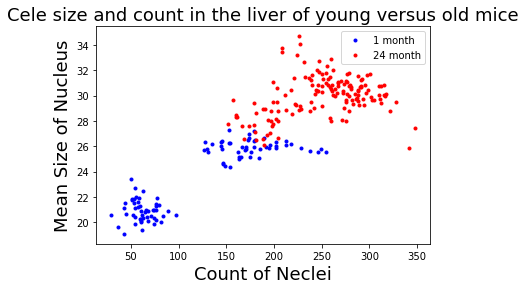

In [136]:
f = plt.figure(figsize=(10, 10))
fig, ax = plt.subplots()
plt.title('Cele size and count in the liver of young versus old mice',fontsize=18)
plt.xlabel('Count of Neclei', fontsize=18)
plt.ylabel('Mean Size of Nucleus', fontsize=18)

ax.plot(X_array_1[:,0],X_array_1[:,1],'.',color='b', label='1 month')
ax.plot(X_array_24[:,0],X_array_24[:,1],'.',color='r', label='24 month')
leg = ax.legend();



In [138]:
X_array.shape

(249, 3)